In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA

### Ex.1

In OpenCV, the default RGB space utilized is often the sRGB color space.


OpenCV primarily uses the BGR color space by default when you load images from JPEG, PNG, or TIFF files. This is different from the common RGB color representation. To perform color space transformations using OpenCV, you can use functions like cv2.cvtColor() to convert between different color spaces. For example, you can convert an image from BGR to grayscale or from BGR to RGB.

In [ ]:
# Read an image in BGR format (default for OpenCV)
bgr_image = cv2.imread('face.jpg')

# Convert BGR to XYZ
xyz_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2XYZ)

# Display the original and converted images
cv2.imshow('BGR Image', bgr_image)
cv2.imshow('XYZ Image', xyz_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Ex.3

brownskinmatterswide_positive.jpg
dry-skin-on-face-blog-1_positive.jpg
dry-skin-on-face-thumbnail_positive.jpg
72308-01_negative.jpg
36196_positive.jpg
sand_negative.jpg
Human_positive.jpg


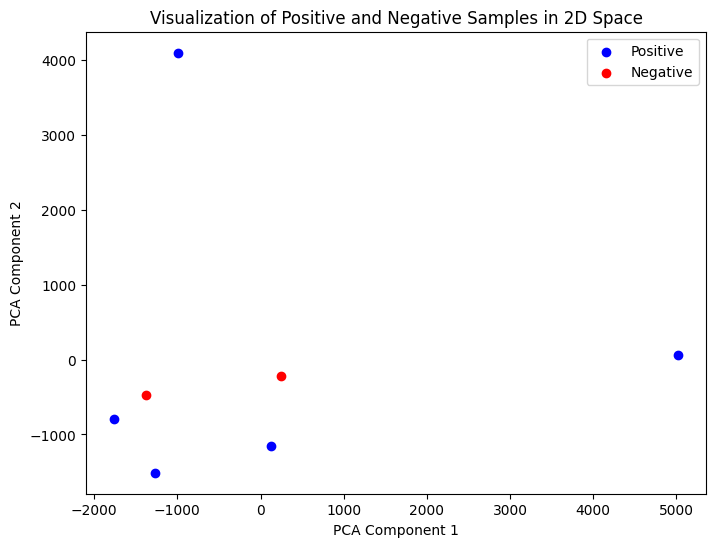

In [13]:
# Path to the folder containing your images
folder_path = './skin_dataset/'

# Lists to store image data and labels
images = []
labels = []

# Define a common size for resizing the images
common_size = (64, 64)  # Change this to your desired size

# Loop through the folder to load images and extract labels
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Assuming images are in jpg or png format
        print(filename)
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img = img.resize(common_size)  # Resize the image to a common size
        img_array = np.array(img)  # Convert image to array

        # Append image data and label
        images.append(img_array)
        # Assuming your filename contains information about the label (e.g., 'positive' or 'negative')
        label = filename.split('_')[1].split('.')[0]  # Extract label from filename
        labels.append(label)

# Convert images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Flatten images into a 2D array
flattened_images = images.reshape(images.shape[0], -1)

# Perform PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
transformed = pca.fit_transform(flattened_images)

# Separate positive and negative samples
positive_samples = transformed[labels == 'positive']
negative_samples = transformed[labels == 'negative']

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(positive_samples[:, 0], positive_samples[:, 1], color='blue', label='Positive')
plt.scatter(negative_samples[:, 0], negative_samples[:, 1], color='red', label='Negative')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.title('Visualization of Positive and Negative Samples in 2D Space')
plt.show()

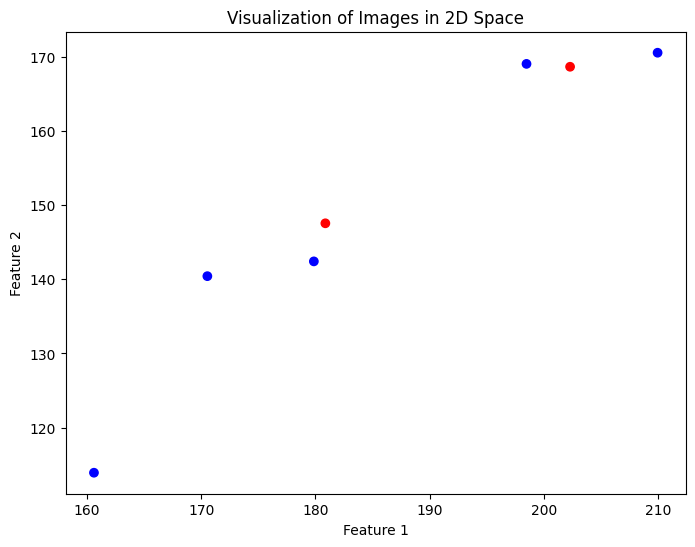

In [14]:
# Reshape images to a lower dimension for visualization (for example, averaging pixel values)
reshaped_images = images.mean(axis=(1, 2))  # Taking mean of pixel values

# Scatter plot using reshaped image data
plt.figure(figsize=(8, 6))
plt.scatter(reshaped_images[:, 0], reshaped_images[:, 1], c=np.where(labels == 'positive', 'blue', 'red'))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of Images in 2D Space')
plt.show()